In [145]:
#importing the libraries
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#loading the dataset 
ind_zomato=pd.read_csv("india_all_restaurants_details.csv")
ind_zomato.head()

,Unnamed: 0,sno,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,coordinates,timings,online_order,table_reservation,delivery_only,famous_food
0,0,0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","28.6177324058,77.2848711535","{'Mon': '1pm – 4pm, 7pm – 10:30pm', 'Tue': '1p...",False,False,False,NaN
1,1,1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","19.2058869331,73.1842865422","{'Mon': '10am – 12midnight', 'Tue': '10am – 12...",False,False,False,Penne Pasta
2,2,2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,0,0,+91 9891828106,North Indian,250,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","28.5630343606,77.2912229598","{'Mon': '12noon – 4pm, 7pm – 12midnight', 'Tue...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D..."
3,3,3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,0,0,+91 9670005455,North Indian,300,"121, Amrit Kaur Market, Opposite New Delhi Rai...","28.6424106380,77.2182980552","{'Mon': '6am – 11:30pm, 12midnight – 1am', 'Tu...",False,False,False,NaN
4,4,4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78,+91 8442828284,"Italian, Pizza, Continental",500,"523, G.T Road, Howrah., Shibpur, Howrah","22.5777582163,88.3307084441","{'Mon': '12noon – 3am', 'Tue': '12noon – 3am',...",True,False,False,NaN


In [147]:
# 1.deleting redundatnt data mainly columns 
ind_zomato=ind_zomato.drop(['Unnamed: 0','sno','zomato_url','telephone','famous_food'],axis=1)

In [148]:
#2.Dropping duplicate records
ind_zomato.drop_duplicates(keep=False,inplace=True) 
ind_zomato.duplicated().sum()

0

In [149]:
#3.checking for null values 
ind_zomato.isnull().sum()

name                    0
city                    0
area                    0
rating                  0
rating_count            0
cusine                  0
cost_for_two            0
address              1785
coordinates             0
timings              2951
online_order            0
table_reservation       0
delivery_only           0
dtype: int64

In [150]:
#3.	Dropping the records with missing values as they were negligible in comparison the size of the dataset
ind_zomato.dropna(how='any',inplace=True)

In [151]:
#4. renaming the column ‘cost_for_two’ as ‘cost’.
ind_zomato = ind_zomato.rename(columns={'cost_for_two':'cost'}) 
ind_zomato.columns

Index(['name', 'city', 'area', 'rating', 'rating_count', 'cusine', 'cost',
       'address', 'coordinates', 'timings', 'online_order',
       'table_reservation', 'delivery_only'],
      dtype='object')

In [152]:
#5.checking the unique values in the columns
ind_zomato['city'].unique()

array(['Delhi NCR', 'Mumbai', 'Kolkata', 'Bengaluru', 'Pune', 'Hyderabad',
       'Chennai', 'Lucknow', 'Kochi', 'Jaipur', 'Ahmedabad', 'Chandigarh',
       'Goa', 'Indore', 'Nashik', 'Ludhiana', 'Ooty', 'Amritsar',
       'Shimla', 'Guwahati', 'Gangtok', 'Kanpur', 'Allahabad', 'Bhopal',
       'Visakhapatnam', 'Bhubaneswar', 'Mangalore', 'Vadodara',
       'Aurangabad', 'Coimbatore', 'Nagpur', 'Dehradun', 'Puducherry',
       'Varanasi', 'Udaipur', 'Pushkar', 'Manipal', 'Rajkot', 'Kota',
       'Surat', 'Vijayawada', 'Jalandhar', 'Jammu', 'Raipur', 'Agra',
       'Srinagar', 'Patna', 'Ranchi', 'Ajmer', 'Tirupati', 'Vellore',
       'Neemrana', 'Cuttack', 'Gorakhpur', 'Madurai', 'Salem', 'Manali',
       'Trivandrum', 'Mysore', 'Mussoorie', 'Trichy', 'Rishikesh',
       'Dharamshala', 'Gwalior', 'Patiala', 'Haridwar', 'Alappuzha',
       'Thrissur', 'Jodhpur', 'Palakkad', 'Jamnagar', 'Siliguri',
       'Nainital', 'Junagadh', 'Meerut', 'Kolhapur', 'Amravati',
       'Jabalpur', 'Jamshe

In [153]:
ind_zomato['rating'].unique()

array(['3.2', '3.6', '0', '3.0', '3.5', '3.8', '4.4', 'NEW', '3.4', '2.8',
       '4.2', '3.7', '4.0', '3.9', '4.7', '3.3', '4.3', '2.9', '2.7',
       '2.5', '4.1', '3.1', '4.9', '2.4', '2.6', '4.5', '4.8', '4.6',
       '2.0', '2.3', '2.2', '1.8', '1.9', '2.1', '4', '3', '2', 'Nové'],
      dtype=object)

In [154]:
#5.a. Dropping the rows in rating columns which had the unique values such as ’NEW’ and ‘Nove’.
#Removing those rows gave a better result in prediction of data compared to imputation of values
ind_zomato = ind_zomato.loc[ind_zomato.rating !='NEW']
ind_zomato = ind_zomato.loc[ind_zomato.rating !='Nové'].reset_index(drop=True)
ind_zomato['rating'] = ind_zomato['rating'].astype(float)
ind_zomato['rating'].unique()

array([3.2, 3.6, 0. , 3. , 3.5, 3.8, 4.4, 3.4, 2.8, 4.2, 3.7, 4. , 3.9,
       4.7, 3.3, 4.3, 2.9, 2.7, 2.5, 4.1, 3.1, 4.9, 2.4, 2.6, 4.5, 4.8,
       4.6, 2. , 2.3, 2.2, 1.8, 1.9, 2.1])

In [155]:
#5.b. Removing commas, full stops in ‘Cost’ column and turning the column into a data type float.
ind_zomato['cost'] = ind_zomato['cost'].astype(str) #Changing the cost to string
ind_zomato['cost'] = ind_zomato['cost'].apply(lambda i: i.replace(',','.')) #Using lambda function to replace ',' from cost
ind_zomato['cost'] = ind_zomato['cost'].astype(float) # Changing the cost to Float
ind_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192350 entries, 0 to 192349
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               192350 non-null  object 
 1   city               192350 non-null  object 
 2   area               192350 non-null  object 
 3   rating             192350 non-null  float64
 4   rating_count       192350 non-null  int64  
 5   cusine             192350 non-null  object 
 6   cost               192350 non-null  float64
 7   address            192350 non-null  object 
 8   coordinates        192350 non-null  object 
 9   timings            192350 non-null  object 
 10  online_order       192350 non-null  bool   
 11  table_reservation  192350 non-null  bool   
 12  delivery_only      192350 non-null  bool   
dtypes: bool(3), float64(2), int64(1), object(7)
memory usage: 15.2+ MB


In [156]:
#5.c.Turning ‘name’ column to camel-case.
ind_zomato.name = ind_zomato.name.apply(lambda j:j.title())

In [157]:
#checking the unique values for columns delivery_only,table_reservation,online_order
ind_zomato['delivery_only'].unique()

array([False,  True])

In [158]:
ind_zomato['table_reservation'].unique()

array([False,  True])

In [159]:
ind_zomato['online_order'].unique()

array([False,  True])

In [160]:
#6.Encode the categorical columns  Variables-reference-https://www.programcreek.com/python/example/101364/pandas.factorize 
def Label_encoding(ind_zomato):
    for col in ind_zomato.columns[~ind_zomato.columns.isin(['rating', 'cost', 'rating_count'])]:
        ind_zomato[col] = ind_zomato[col].factorize()[0]
    return ind_zomato

ind_zomato_nw = Label_encoding(ind_zomato.copy())
ind_zomato_nw.head()

,name,city,area,rating,rating_count,cusine,cost,address,coordinates,timings,online_order,table_reservation,delivery_only
0,0,0,0,3.2,21,0,300.0,0,0,0,0,0,0
1,1,1,1,3.6,51,1,500.0,1,1,1,0,0,0
2,2,0,2,0.0,0,0,250.0,2,2,2,0,0,0
3,3,0,3,0.0,0,0,300.0,3,3,3,0,0,0
4,4,2,4,3.0,78,2,500.0,4,4,4,1,0,0


Index(['name', 'city', 'area', 'rating', 'rating_count', 'cusine', 'cost',
       'address', 'coordinates', 'timings', 'online_order',
       'table_reservation', 'delivery_only'],
      dtype='object')

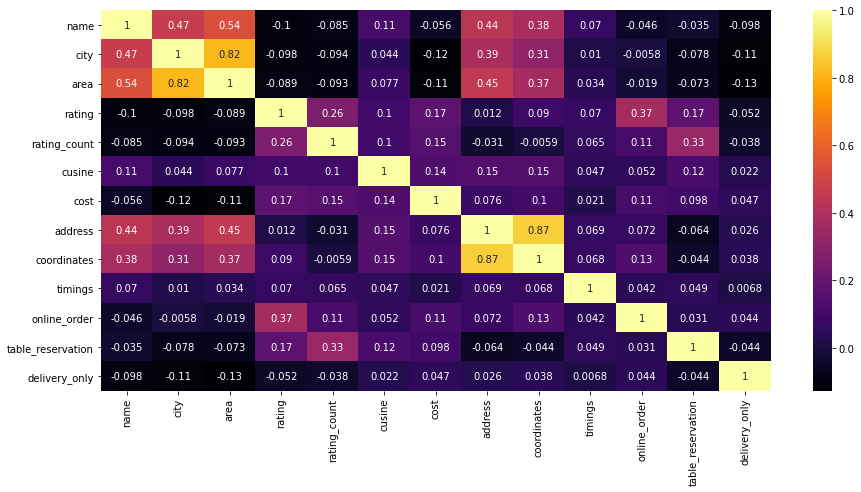

In [162]:
#Plotting the Heatmap using Pearson’s coefficient 
corr = ind_zomato_nw.corr(method='pearson')
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True,cmap="inferno")
ind_zomato_nw.columns

**City’, ‘Area’, ‘Address’ and ‘coordinates’ are correlated so we will use only ‘city’ column in our model to avoid multicollinearity. The columns ‘rating’ and ‘rating_count’ however remain the same

In [163]:
ind_zomato_nw.head()

,name,city,area,rating,rating_count,cusine,cost,address,coordinates,timings,online_order,table_reservation,delivery_only
0,0,0,0,3.2,21,0,300.0,0,0,0,0,0,0
1,1,1,1,3.6,51,1,500.0,1,1,1,0,0,0
2,2,0,2,0.0,0,0,250.0,2,2,2,0,0,0
3,3,0,3,0.0,0,0,300.0,3,3,3,0,0,0
4,4,2,4,3.0,78,2,500.0,4,4,4,1,0,0


In [164]:
#checking null values in the dataframe
ind_zomato_nw.isnull().sum()

name                 0
city                 0
area                 0
rating               0
rating_count         0
cusine               0
cost                 0
address              0
coordinates          0
timings              0
online_order         0
table_reservation    0
delivery_only        0
dtype: int64

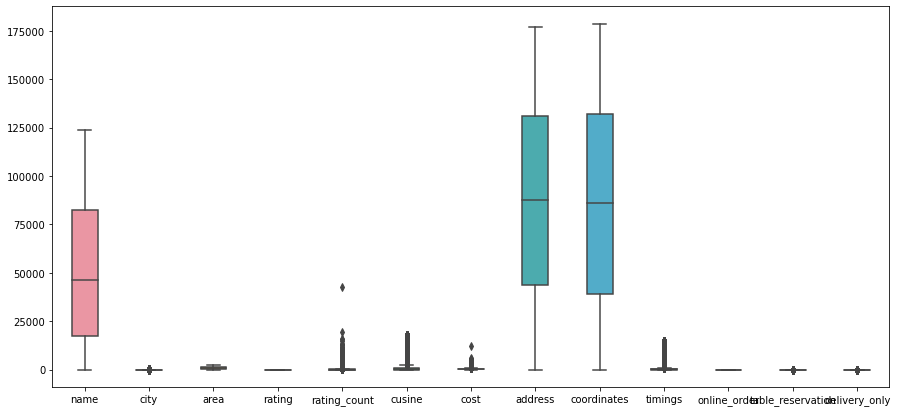

In [165]:
#8.Plotting boxplots for all the columns in the dataset 
fig, axis = plt.subplots(figsize=(15,7))
sns.boxplot(data=ind_zomato_nw, width= 0.4,ax=axis)

**Eliminating the outliers for columns ‘rating_count’ and ‘cost’ as we would be using it into our model.The columns such as name, timings,area are not used in the model to avoid Multicollinearity 

In [166]:
#Eliminating the outliers for columns ‘rating_count’ and ‘cost’
q = ind_zomato_nw['cost'].quantile(0.95)
ind_zomato_nw = ind_zomato_nw[ind_zomato_nw['cost']<q]

In [167]:
q = ind_zomato_nw['rating_count'].quantile(0.90)
ind_zomato_nw = ind_zomato_nw[ind_zomato_nw['rating_count']<q]

In [203]:
#Defining the independent variables and dependent variables
x = ind_zomato_nw.iloc[:,[1,3,4,5,10,11,12]]#ind_zomato_nw
y = ind_zomato_nw['cost']

In [204]:
#checking multicollinearity 
#ref-https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["Features"] = x.columns
vif["vif"] = [variance_inflation_factor(x.values,z) for z in range(len(x.columns))]
vif

,Features,vif
0,city,1.328857
1,rating,3.187935
2,rating_count,2.096505
3,cusine,1.193996
4,online_order,2.181117
5,table_reservation,1.039352
6,delivery_only,1.055291


**The VIF factor if greater than 5 and then we need to take care of the correlation by eleminating columns 

In [205]:
#regression analysis
from sklearn.model_selection import train_test_split
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=353)
x_train.head()

,city,rating,rating_count,cusine,online_order,table_reservation,delivery_only
118273,30,3.0,5,300,1,0,0
44399,1,3.4,29,143,0,0,0
64596,3,3.1,25,3,0,0,0
46705,5,3.7,72,240,1,0,0
119045,30,0.0,0,43,1,0,0


In [171]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DescisionTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DescisionTree.fit(x_train,y_train)

# predicting values on train and test sets 

y_predict_train=DescisionTree.predict(x_train)
y_predict_test=DescisionTree.predict(x_test)
print(DescisionTree.score(x_test,y_test))

from sklearn.metrics import r2_score
r2_test=r2_score(y_test,y_predict_test)
r2_train=r2_score(y_train,y_predict_train)
print('R-squared for test data ',r2_test)
print('R-squared for train data ',r2_train)

0.9153683510321621
R-squared for test data  0.9153683510321621
R-squared for train data  0.934799270283186


In [172]:
#Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RandomForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RandomForest.fit(x_train,y_train)

# predicting values on train and test sets 
y_predict_train_rf=RandomForest.predict(x_train)
y_predict_test_rf=RandomForest.predict(x_test)
print(RandomForest.score(x_test,y_test))
RandomForest

from sklearn.metrics import r2_score
r2_test_rf=r2_score(y_train,y_predict_train_rf)
r2_train_rf=r2_score(y_test,y_predict_test_rf)
print('R-squared for test data ',r2_test_rf)
print('R-squared for train data ',r2_train_rf)

0.9230816618108879
R-squared for test data  0.9356524032804955
R-squared for train data  0.9230816618108879


# Visualising relationships between cities of india and the cost of food in restaurants .

Text(0, 0.5, 'city')

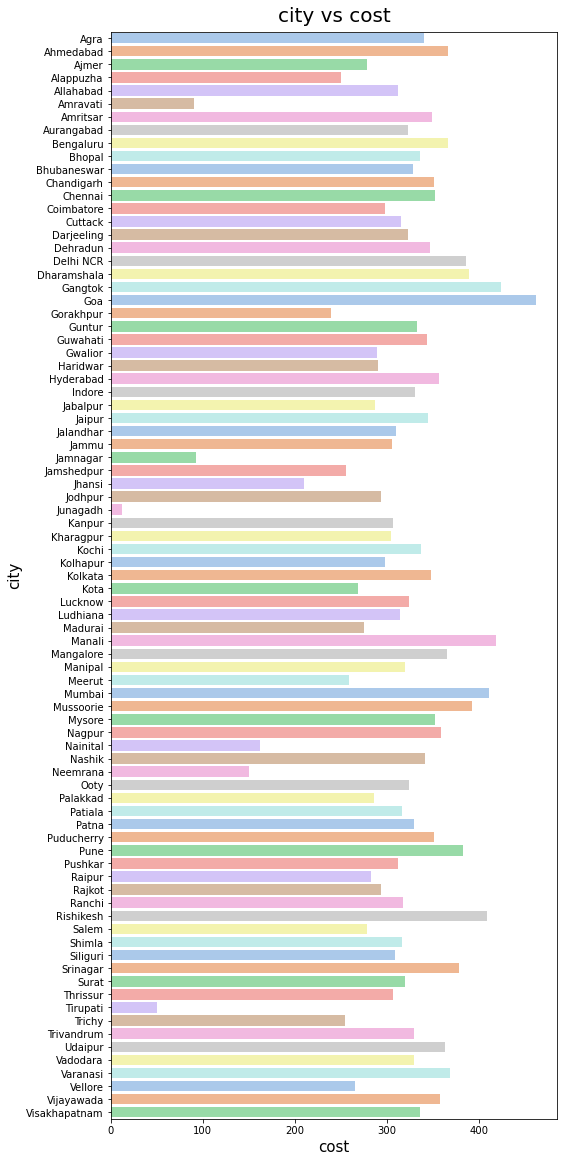

In [173]:
#grouping by cities in the dataframe 
ind_city= ind_zomato.groupby("city")

#plotting a barplot od city vs the cost
plt.figure(figsize=(8,20))
city_n_cost=ind_city['cost'].mean()#we have considered the average of the cost per city
sns.barplot(x=city_n_cost,y=city_n_cost.index,palette='pastel')
plt.title("city vs cost",size=20,pad=10)
plt.xlabel("cost",size=15)
plt.ylabel("city",size=15)

# WordClouds for popular cuisines and foods served in the restaurants 

In [175]:
# Reloading the dataset as we had dropped the famous_food column for a better modelling
#we use it to understand the popular foods served in the restaurants  
in_zom=pd.read_csv("india_all_restaurants_details.csv")
#checking for null values
in_zom.isnull().sum()

Unnamed: 0                0
sno                       0
zomato_url                0
name                      0
city                      0
area                      0
rating                    0
rating_count              0
telephone                 0
cusine                    0
cost_for_two              0
address                1785
coordinates               0
timings                2964
online_order              0
table_reservation         0
delivery_only             0
famous_food          171994
dtype: int64

In [176]:
#extracting the rows with relevant records for popular foods
in_zom['famous_food'].unique()
in_zom.dropna(how='any',inplace=True)

In [177]:
#reference-https://www.kaggle.com/thiagopanini/predicting-the-success-of-a-restaurant
#plotting a word cloud for the popular foods served in the restaurant 
famous_food = list(in_zom['famous_food'].astype(str).values)

In [178]:
famous_food_word_list = []
for lista in [c.split(',') for c in famous_food]:
    for word in lista:
        famous_food_word_list.append(word.strip())

In [179]:
from collections import Counter
famous_food_word_list_dict = Counter(famous_food_word_list)

In [180]:
famous_food_word_list_dict

Counter({'Penne Pasta': 50,
         'Chana Masala': 76,
         'Butter Naan': 1168,
         'Paneer Bhujia': 3,
         'Dal Makhani': 4099,
         'Momos': 2544,
         'Liti Chokha': 71,
         'Chicken Momo': 509,
         'Litti': 40,
         'Noodle': 3786,
         'Tandoori Chicken': 2803,
         'Pizza': 6259,
         'Butter Chicken': 4118,
         'Tomato Soup': 255,
         'Murgh Lababdar': 106,
         'Fried Rice Chicken': 410,
         'Kadhai Paneer': 629,
         'Paneer Tikka': 1922,
         'Gulab Jamun': 1488,
         'Cheese Garlic Naan': 41,
         'Mushroom Tikka': 38,
         'Cheese Pav Bhaji': 93,
         'Dum Biryani': 285,
         'Fish': 2368,
         'Bbq Chicken': 179,
         'Veg Pulao': 53,
         'Coffee': 3502,
         'Biryani': 4602,
         'Naan': 1705,
         'Mocktails': 3101,
         'Pasta': 6008,
         'Chilli Chicken': 830,
         'Nachos': 1748,
         'Chicken Tikka': 1275,
         'Pink Pasta': 

In [181]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=2000, height=1000,repeat=False,
                       background_color='black')

In [182]:
wordcloud.generate_from_frequencies(famous_food_word_list_dict)

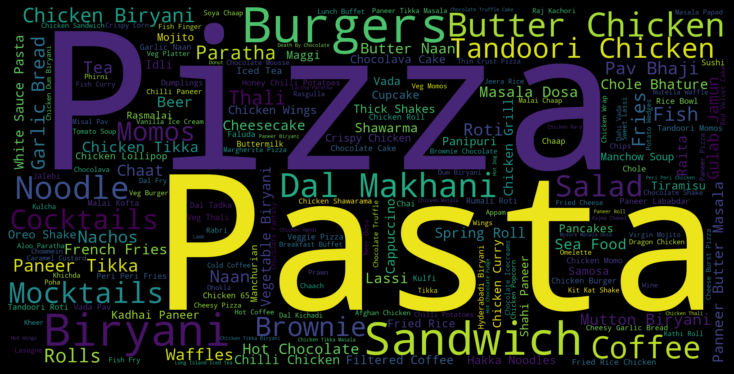

In [183]:
fig=plt.figure(
figsize=(10,5),
facecolor='k',
edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [184]:
#plotting a word cloud for the popular cusines served by the restaurant
in_zom1=pd.read_csv("india_all_restaurants_details.csv")
in_zom1['cusine'].unique()

array(['North Indian', 'Street Food, Chinese, Fast Food',
       'Italian, Pizza, Continental', ...,
       'Chinese, North Indian, South Indian, Ice Cream, Momos',
       'Burger, Cafe, Chinese, Continental, Modern Indian, North Indian',
       'Himachali, Asian'], dtype=object)

In [185]:
#reference-https://www.kaggle.com/thiagopanini/predicting-the-success-of-a-restaurant
cuisines = list(in_zom1['cusine'].astype(str).values)

In [186]:
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        

In [187]:
from collections import Counter
cuisines_wc_dict = Counter(cuisines_word_list)

In [188]:
cuisines_wc_dict

Counter({'North Indian': 88565,
         'Street Food': 14193,
         'Chinese': 62685,
         'Fast Food': 56872,
         'Italian': 8729,
         'Pizza': 8623,
         'Continental': 11313,
         'Rolls': 5382,
         'Desserts': 21997,
         'Panini': 14,
         'Sandwich': 5169,
         'South Indian': 26111,
         'Beverages': 22401,
         'Healthy Food': 3190,
         'Momos': 3887,
         'Asian': 2535,
         'Mithai': 7074,
         'Biryani': 17171,
         'Mughlai': 11472,
         'Kebab': 2367,
         'Bakery': 16749,
         'Bengali': 1573,
         'American': 1418,
         'Salad': 2055,
         'Cafe': 9610,
         'Burger': 5457,
         'Talianska': 30,
         'Džúsy a šťavy': 3,
         'Mishti': 607,
         'Ice Cream': 8531,
         'Kontinentálna': 45,
         'Americká': 31,
         'Ázijská': 24,
         'Severoindická': 104,
         'Čínska': 73,
         'Nápoje': 27,
         'Mexican': 1819,
         'Seafo

In [189]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=1280, height=720,repeat=False, 
                      colormap='magma', background_color='white')

In [190]:
wordcloud.generate_from_frequencies(cuisines_wc_dict)

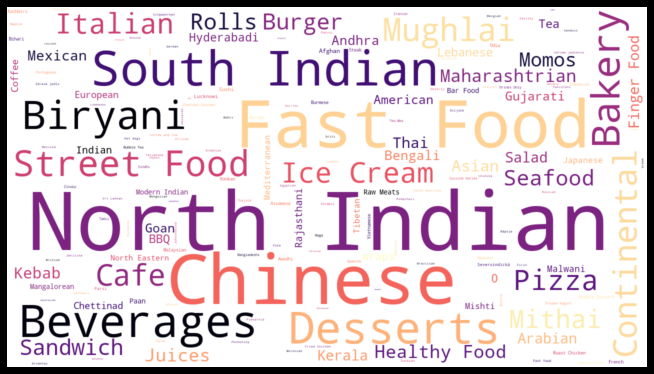

In [191]:
fig=plt.figure(
figsize=(10,5),
facecolor='k',
edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Plotting the top 50 restaurant chains in india

In [192]:
# Turning ‘name’ column to camel-case
in_zom1.name = in_zom.name.apply(lambda x:x.title())

Text(0.5, 0, 'Number of outlets')

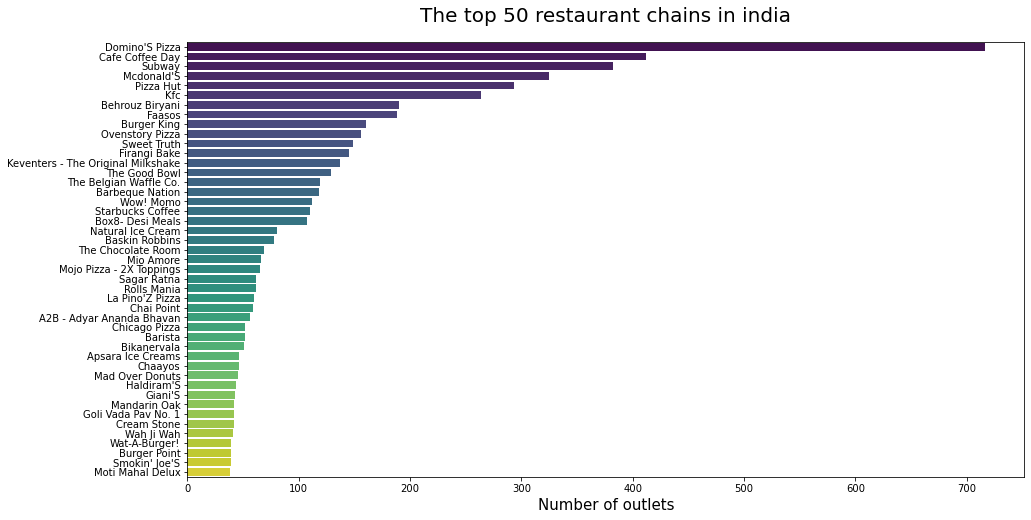

In [193]:
plt.figure(figsize=(15,8))
popular=in_zom1['name'].value_counts()[:45]
sns.barplot(x=popular,y=popular.index,palette='viridis')
plt.title("The top 50 restaurant chains in india",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

# rating vs online ordering / table_reservation / delivery_only /cost

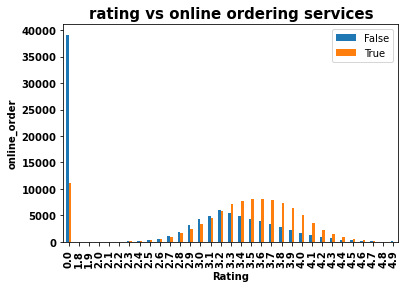

In [194]:
#plotting rating vs online ordering services
#reference-https://www.kaggle.com/thiagopanini/predicting-the-success-of-a-restaurant
loc_plt=pd.crosstab(ind_zomato['rating'],ind_zomato['online_order'])
loc_plt.plot(kind='bar');
plt.title('rating vs online ordering services',fontsize=15,fontweight='bold')
plt.ylabel('online_order',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

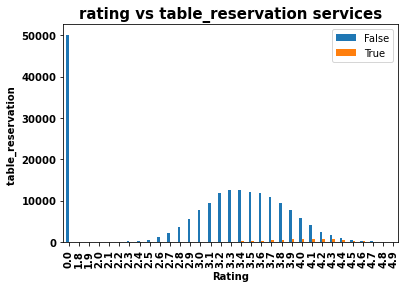

In [195]:
#plotting rating vs table_reservation services
loc_plt=pd.crosstab(ind_zomato['rating'],ind_zomato['table_reservation'])
loc_plt.plot(kind='bar');
plt.title('rating vs table_reservation services',fontsize=15,fontweight='bold')
plt.ylabel('table_reservation ',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

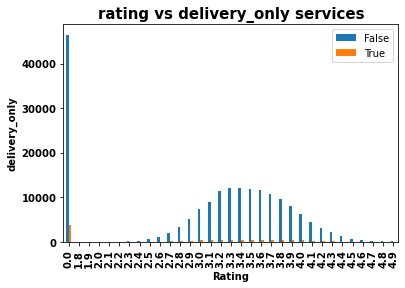

In [196]:
#plotting rating vs delivery_only services
loc_plt=pd.crosstab(ind_zomato['rating'],ind_zomato['delivery_only'])
loc_plt.plot(kind='bar');
plt.title('rating vs delivery_only services',fontsize=15,fontweight='bold')
plt.ylabel('delivery_only',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

In [197]:
ind_zomato = ind_zomato.loc[ind_zomato.rating !='NEW']
ind_zomato = ind_zomato.loc[ind_zomato.rating !='Nové'].reset_index(drop=True)
ind_zomato['rating'] = ind_zomato['rating'].astype(float)
ind_zomato['rating'].unique()

C:\Users\Divya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([3.2, 3.6, 0. , 3. , 3.5, 3.8, 4.4, 3.4, 2.8, 4.2, 3.7, 4. , 3.9,
       4.7, 3.3, 4.3, 2.9, 2.7, 2.5, 4.1, 3.1, 4.9, 2.4, 2.6, 4.5, 4.8,
       4.6, 2. , 2.3, 2.2, 1.8, 1.9, 2.1])

In [198]:
#typecasting 'rating' column and grouping by the ratings 
ind_zomato['rating'].astype('int64')
ind_rating= ind_zomato.groupby("rating")
ind_zomato['rating']


0         3.2
1         3.6
2         0.0
3         0.0
4         3.0
         ... 
192345    0.0
192346    0.0
192347    3.2
192348    3.2
192349    3.2
Name: rating, Length: 192350, dtype: float64

Text(0, 0.5, 'rating')

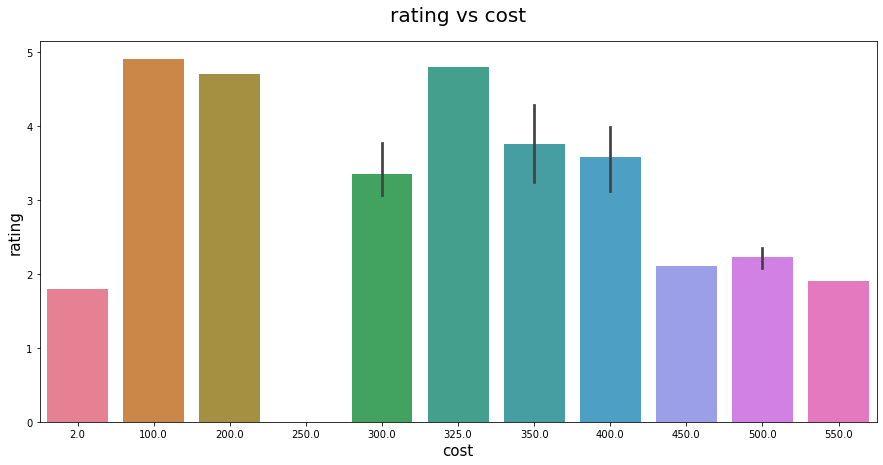

In [199]:
#plotting rating vs cost 
plt.figure(figsize=(15,7))
city_n_cost=ind_rating['cost'].median()
sns.barplot(x=city_n_cost,y=city_n_cost.index,palette='husl')
plt.title("rating vs cost",size=20,pad=20)
plt.xlabel("cost",size=15)
plt.ylabel("rating",size=15)
